In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
img=cv2.imread('grp_img.jpg',0)

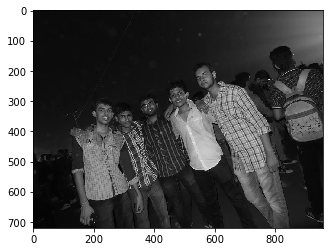

In [3]:
plt.imshow(img,cmap='gray')

In [4]:
lbp_face_cascade=cv2.CascadeClassifier('F:\\opencv3.3.1\\build\\etc\\lbpcascades\\lbpcascade_frontalface_improved.xml')

In [5]:
faces=lbp_face_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)

In [6]:
print ('Faces Found: '+ str(len(faces)))

Faces Found: 1


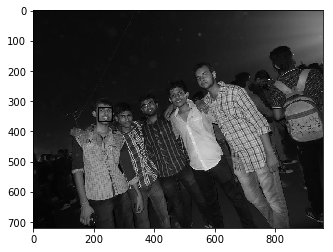

In [7]:
img2=cv2.imread('grp_img.jpg',0)
for (x,y,w,h) in faces:
    cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.imshow(img2,cmap='gray')

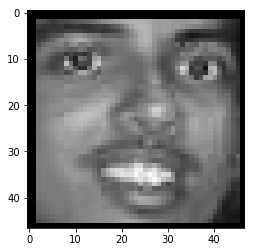

In [8]:
face_part=img2[y:y+h,x:x+w]

plt.imshow(face_part,cmap='gray')

In [9]:
type(face_part)

numpy.ndarray

In [10]:
sift=cv2.xfeatures2d.SIFT_create(nOctaveLayers=5,contrastThreshold=0.03,edgeThreshold=10)

In [11]:
kp,desc=sift.detectAndCompute(face_part,None)

In [12]:
print(len(kp))

29


In [13]:
a=cv2.drawKeypoints(face_part,kp,outImage=None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [14]:
cv2.imwrite('sift_keypoints4.jpg',a)

True

In [15]:
face_keypoints=cv2.imread('sift_keypoints4.jpg',0)

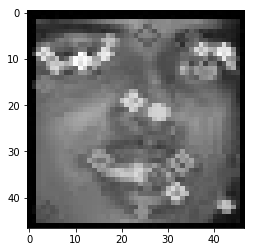

In [16]:
plt.imshow(face_keypoints,cmap='gray')

In [17]:
res=cv2.resize(face_part,None,fx=5, fy=5, interpolation = cv2.INTER_CUBIC)

In [18]:
res.shape

(235, 235)

In [19]:
face_part.shape

(47, 47)

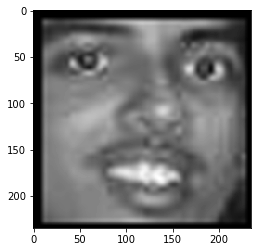

In [20]:
plt.imshow(res,cmap='gray')

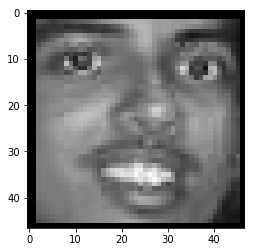

In [21]:
plt.imshow(face_part,cmap='gray')

In [22]:
sift2=cv2.xfeatures2d.SIFT_create(nfeatures=100,nOctaveLayers=5,contrastThreshold=0.03,edgeThreshold=10)

In [23]:
kp,desc=sift2.detectAndCompute(res,None)

print(len(kp))

79


In [24]:
print (desc.shape)

(79, 128)


In [25]:
a=cv2.drawKeypoints(res,kp,outImage=None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

In [26]:
cv2.imwrite('sift_keypoints4.jpg',a)

True

In [27]:
face_keypoints=cv2.imread('sift_keypoints4.jpg',0)

In [28]:
cv2.imshow('image',face_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

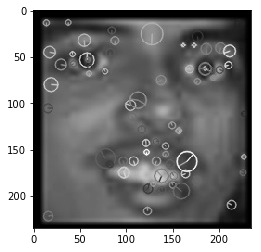

In [29]:
plt.imshow(face_keypoints,cmap='gray')

In [30]:
faces

array([[216, 321,  47,  47]], dtype=int32)

In [31]:
#faces = haar_cascade.detectMultiScale(gray2, scaleFactor=1.2, minNeighbors=5);

In [32]:
def detect_face(test_image_path):
    face_list=[]
    haar_cascade=cv2.CascadeClassifier('F:\\opencv3.3.1\\build\\etc\\haarcascades\\haarcascade_frontalface_default.xml')
    for i in range(8):
        img=cv2.imread(test_image_path+str(i+1)+'.jpg',0)
        face=haar_cascade.detectMultiScale(img, scaleFactor=1.2, minNeighbors=5)
        try:
            (x,y,w,h)=face[0]
            face_list.append(img[y:y+h,x:x+w])
            print('Prepared for image '+ str(i+1)+'.jpg')
        except:
            print('cannot prepare for image '+ str(i+1)+'.jpg')
    print("Prepared")
    return face_list

In [33]:
faces=detect_face('test_images/')

Prepared for image 1.jpg
cannot prepare for image 2.jpg
cannot prepare for image 3.jpg
cannot prepare for image 4.jpg
cannot prepare for image 5.jpg
cannot prepare for image 6.jpg
Prepared for image 7.jpg
Prepared for image 8.jpg
Prepared


In [34]:
len(faces)

3

In [35]:
def prepare_sift_features(faces):
    kp=[]
    desc=[]
    sift=cv2.xfeatures2d.SIFT_create(nfeatures=65)
    for i in range(len(faces)):
        a,b = sift.detectAndCompute(faces[i],None)
        kp.append(a)
        desc.append(b)
        print ('Processed for '+str(i+1)+'image')
    print ('process complete.')
    return (kp,desc)

In [36]:
kp,desc=prepare_sift_features(faces)

Processed for 1image
Processed for 2image
Processed for 3image
process complete.


In [37]:
from sklearn.cluster import KMeans

In [38]:
kmean=KMeans(n_clusters=65)

In [39]:
kmean.fit(desc)

ValueError: setting an array element with a sequence.

In [ ]:
plt.imshow()